# ACCIDENT DETECTION MODEL

DATASET USED: Accident Detection From CCTV Footage

LOADING THE DATA

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os

In [2]:
batch_size = 100
img_height = 250
img_width = 250

In [3]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
     r"C:\Users\Student\Downloads\train",
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size

)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\Student\Downloads\test",
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\Student\Downloads\val",
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)
class_names = training_ds.class_names

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


DEFINING THE MODELS

# 1.Sequential model

In [4]:
## Defining Cnn
my_cnn = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'sigmoid')
])

# dropout =0.2,optimizer=adam

FITTING AND COMPILING THE MODEL

In [5]:
from keras.preprocessing.image import ImageDataGenerator
my_cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.4,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
type(training_ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [8]:
model=my_cnn.fit(training_ds, validation_data = validation_ds, epochs =30)

Epoch 1/30
8/8 [==============================] - 24s 3s/step - loss: 30.4812 - accuracy: 0.5044 - val_loss: 9.3693 - val_accuracy: 0.5306
Epoch 2/30
8/8 [==============================] - 23s 3s/step - loss: 2.0967 - accuracy: 0.5348 - val_loss: 0.6874 - val_accuracy: 0.5816
Epoch 3/30
8/8 [==============================] - 23s 3s/step - loss: 0.6685 - accuracy: 0.6435 - val_loss: 0.6904 - val_accuracy: 0.5408
Epoch 4/30
8/8 [==============================] - 23s 3s/step - loss: 0.6800 - accuracy: 0.6498 - val_loss: 0.6914 - val_accuracy: 0.4796
Epoch 5/30
8/8 [==============================] - 23s 3s/step - loss: 0.6809 - accuracy: 0.6523 - val_loss: 0.6913 - val_accuracy: 0.5408
Epoch 6/30
8/8 [==============================] - 22s 3s/step - loss: 0.6782 - accuracy: 0.6852 - val_loss: 0.6910 - val_accuracy: 0.6327
Epoch 7/30
8/8 [==============================] - 23s 3s/step - loss: 0.6736 - accuracy: 0.7155 - val_loss: 0.6902 - val_accuracy: 0.5816
Epoch 8/30
8/8 [=================

In [39]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load datasets
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
     r"C:\Users\Student\Downloads\train",
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size

)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\Student\Downloads\test",
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\Student\Downloads\val",
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)
class_names = training_ds.class_names

# Configure datasets for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Load and preprocess the test image
test_image = image.load_img(r"C:\Users\Student\Downloads\test\Non Accident\test3_21.jpg", target_size=(250, 250))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Normalize the pixel values
test_image = test_image / 255.0

# Make a prediction
result = model.predict(test_image)

# Map the class indices to class labels
if result[0][0] >= 0.5:
    prediction = class_names[1]  # Accident
else:
    prediction = class_names[0]  # Non-Accident

print(prediction)


Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.
1/1 [==============================] - 1s 607ms/step
Non Accident


VISUALIZING THE DATA

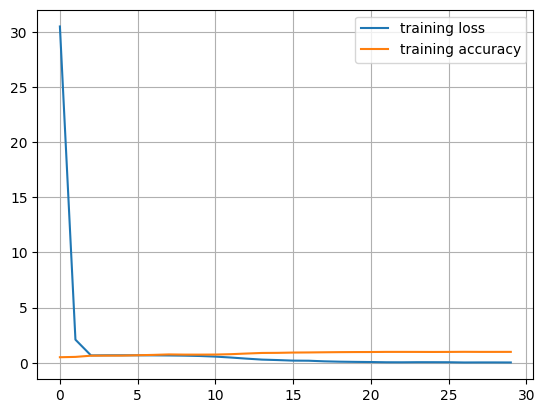

In [9]:
## stats on training data
plt.plot(model.history['loss'], label = 'training loss')
plt.plot(model.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

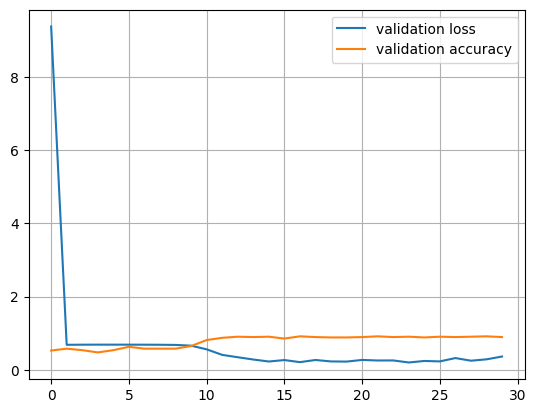

In [10]:
## stats on validation data
plt.plot(model.history['val_loss'], label = 'validation loss')
plt.plot(model.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

PREDICTING THE MODELS

4/4 [==============================] - 0s 89ms/step


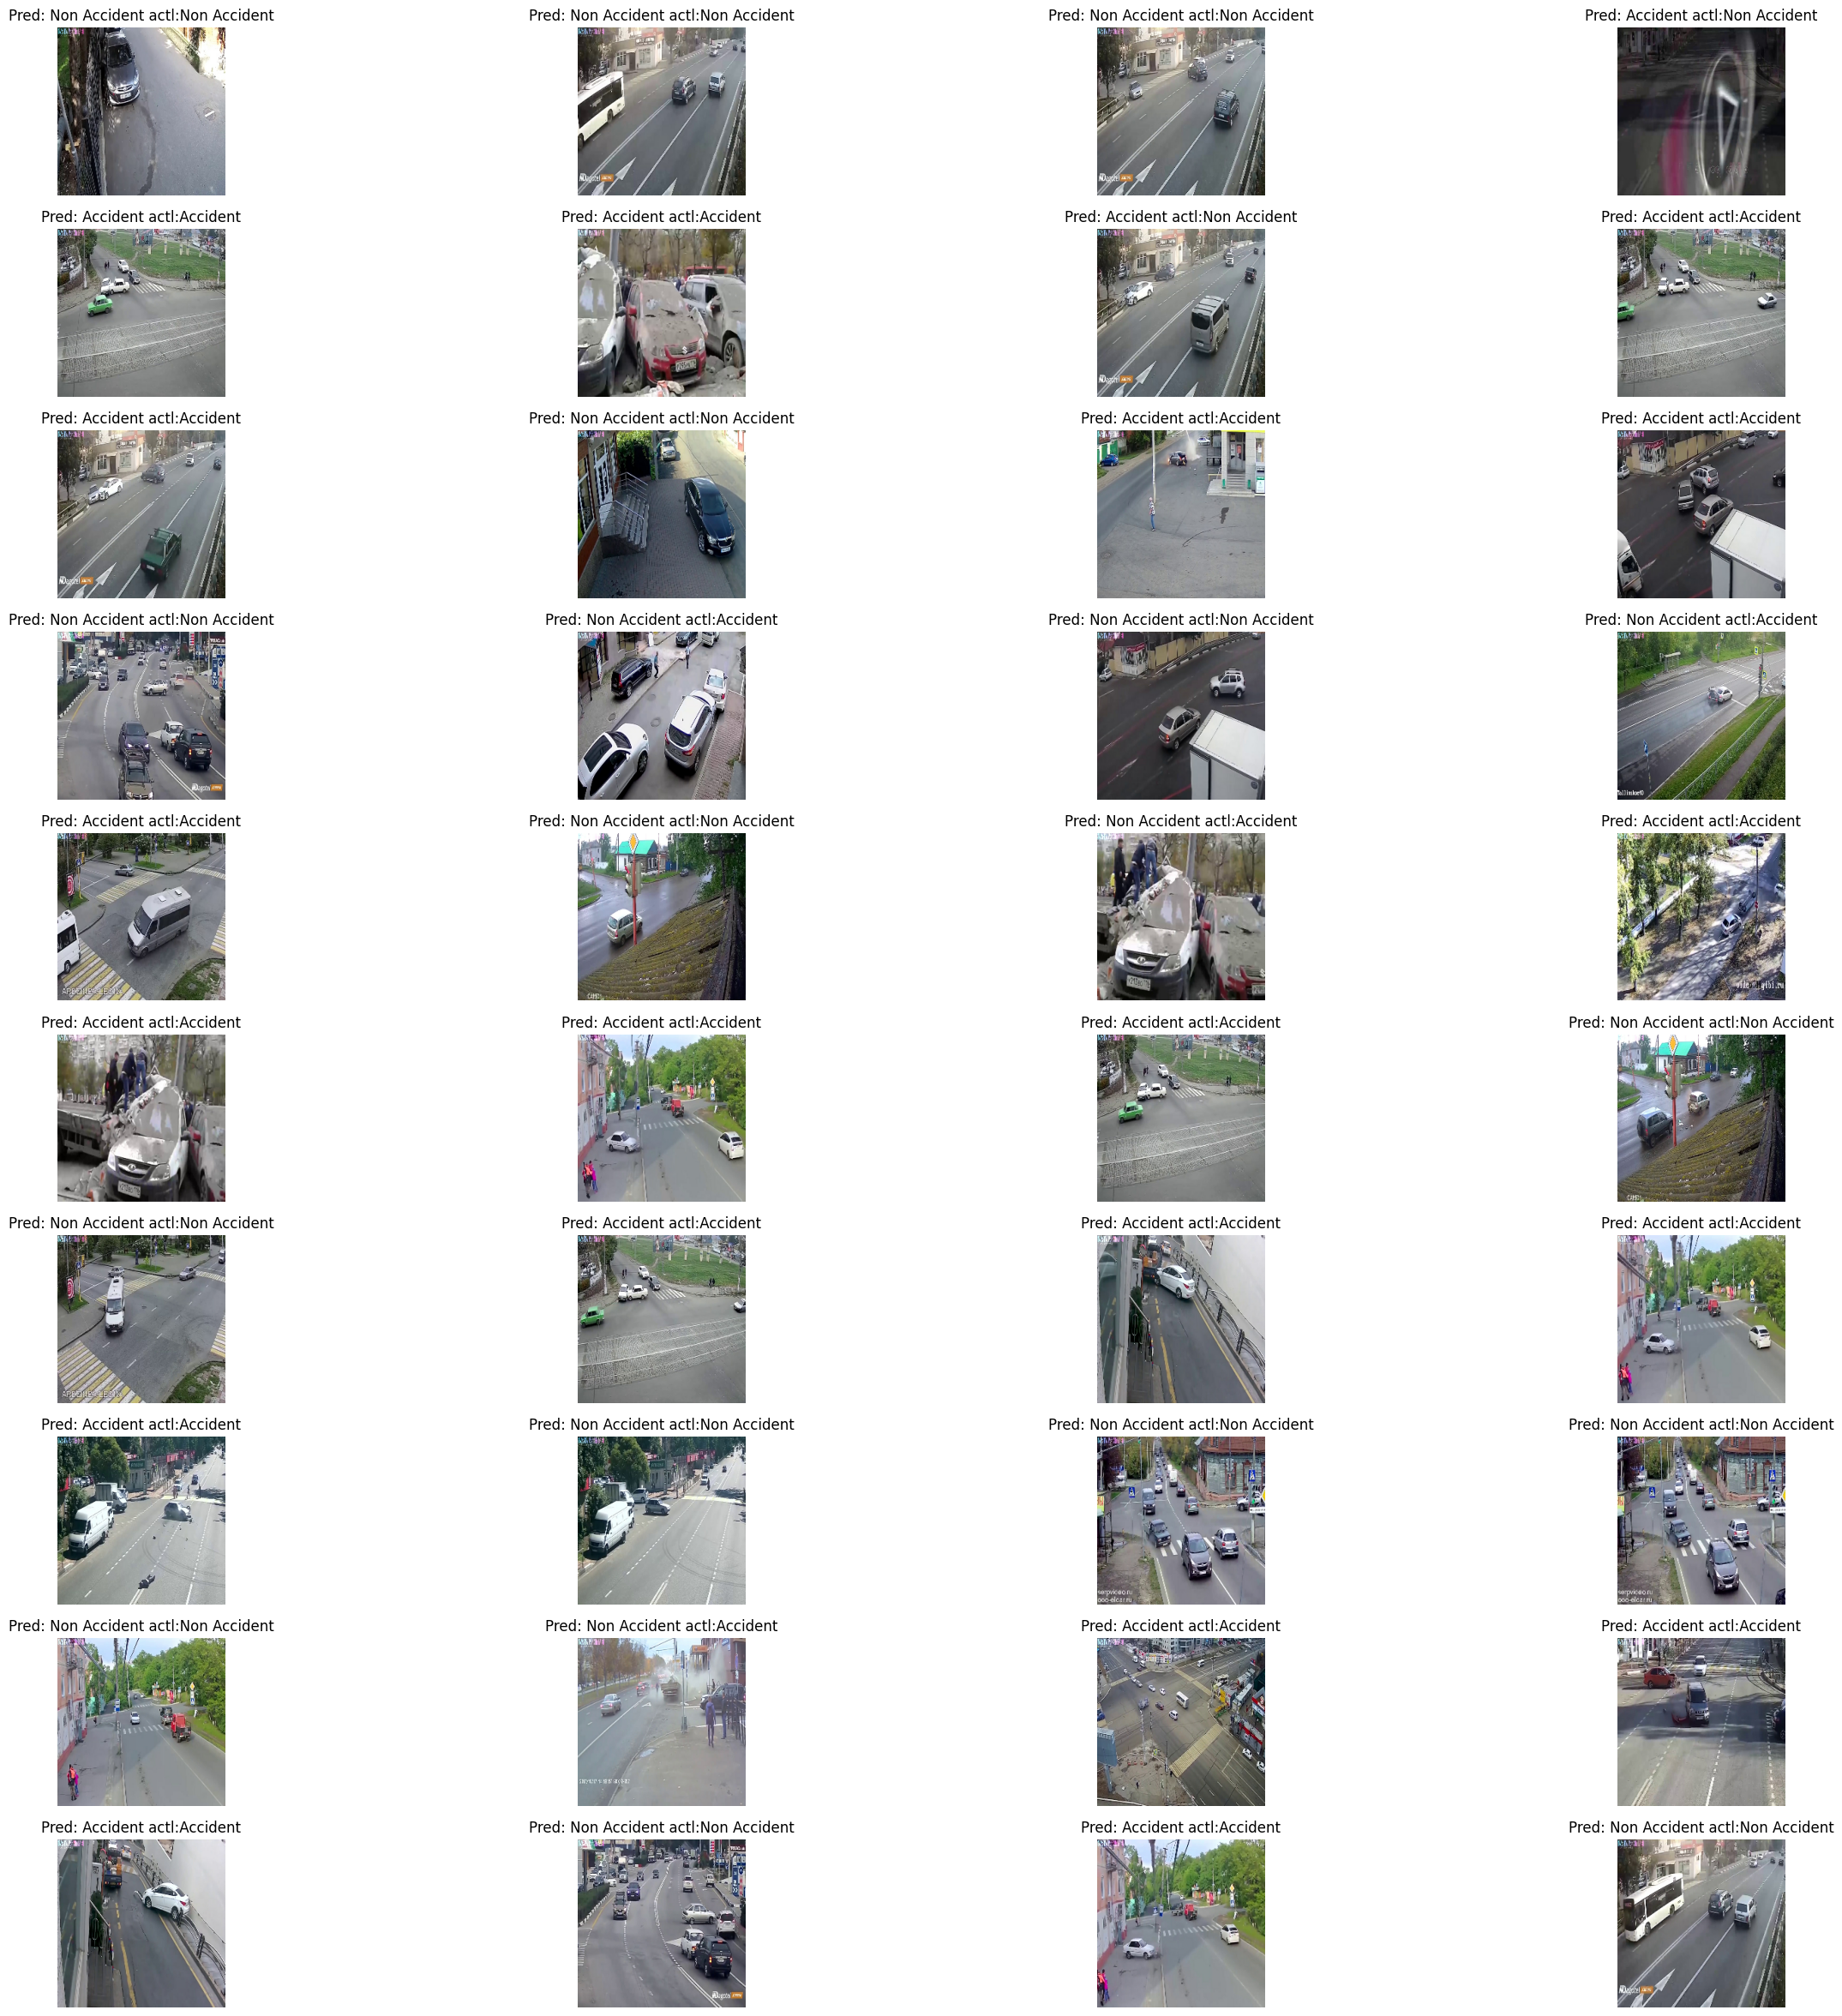

In [11]:
## lets vizualize results on testing data
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in test_ds.take(1):
    predictions = my_cnn.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [12]:
print(class_names)

['Accident', 'Non Accident']


# dropout =0.2,optimizer=adadelta

In [13]:
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'sigmoid')
])
from keras.preprocessing.image import ImageDataGenerator
model.compile(optimizer='adadelta',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.4,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
model.fit(training_ds, validation_data = validation_ds, epochs = 30)

Epoch 1/30
8/8 [==============================] - 25s 3s/step - loss: 0.7291 - accuracy: 0.5247 - val_loss: 0.7601 - val_accuracy: 0.5306
Epoch 2/30
8/8 [==============================] - 24s 3s/step - loss: 0.6749 - accuracy: 0.5929 - val_loss: 0.7269 - val_accuracy: 0.5408
Epoch 3/30
8/8 [==============================] - 24s 3s/step - loss: 0.6399 - accuracy: 0.6410 - val_loss: 0.6823 - val_accuracy: 0.6020
Epoch 4/30
8/8 [==============================] - 24s 3s/step - loss: 0.6301 - accuracy: 0.6422 - val_loss: 0.7639 - val_accuracy: 0.5102
Epoch 5/30
8/8 [==============================] - 24s 3s/step - loss: 0.6183 - accuracy: 0.6435 - val_loss: 0.7890 - val_accuracy: 0.5102
Epoch 6/30
8/8 [==============================] - 24s 3s/step - loss: 0.5981 - accuracy: 0.6637 - val_loss: 0.7514 - val_accuracy: 0.5204
Epoch 7/30
8/8 [==============================] - 24s 3s/step - loss: 0.5818 - accuracy: 0.6890 - val_loss: 0.7702 - val_accuracy: 0.5102
Epoch 8/30
8/8 [==================

# dropout =0.3,optimizer=adam

In [14]:
## Defining Cnn
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.3),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'sigmoid')
])
from keras.preprocessing.image import ImageDataGenerator
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.4,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
model.fit(training_ds, validation_data = validation_ds, epochs = 30)

Epoch 1/30
8/8 [==============================] - 24s 3s/step - loss: 40.0416 - accuracy: 0.5221 - val_loss: 20.4788 - val_accuracy: 0.5306
Epoch 2/30
8/8 [==============================] - 23s 3s/step - loss: 4.1391 - accuracy: 0.5297 - val_loss: 0.6890 - val_accuracy: 0.5000
Epoch 3/30
8/8 [==============================] - 23s 3s/step - loss: 0.7158 - accuracy: 0.4665 - val_loss: 0.6863 - val_accuracy: 0.5102
Epoch 4/30
8/8 [==============================] - 23s 3s/step - loss: 0.6815 - accuracy: 0.5209 - val_loss: 0.6868 - val_accuracy: 0.5918
Epoch 5/30
8/8 [==============================] - 22s 3s/step - loss: 0.6708 - accuracy: 0.6460 - val_loss: 0.6859 - val_accuracy: 0.6429
Epoch 6/30
8/8 [==============================] - 23s 3s/step - loss: 0.6546 - accuracy: 0.7231 - val_loss: 0.6827 - val_accuracy: 0.6531
Epoch 7/30
8/8 [==============================] - 23s 3s/step - loss: 0.6264 - accuracy: 0.7320 - val_loss: 0.6697 - val_accuracy: 0.6224
Epoch 8/30
8/8 [================

# dropout =0.3,optimizer=adadelta

In [15]:
## Defining Cnn
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.3),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'sigmoid')
])
from keras.preprocessing.image import ImageDataGenerator
model.compile(optimizer='adadelta',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.4,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
model.fit(training_ds, validation_data = validation_ds, epochs = 30)

Epoch 1/30
8/8 [==============================] - 25s 3s/step - loss: 0.7225 - accuracy: 0.5398 - val_loss: 0.7706 - val_accuracy: 0.4796
Epoch 2/30
8/8 [==============================] - 24s 3s/step - loss: 0.6886 - accuracy: 0.5676 - val_loss: 0.7230 - val_accuracy: 0.4898
Epoch 3/30
8/8 [==============================] - 24s 3s/step - loss: 0.6414 - accuracy: 0.6460 - val_loss: 0.7039 - val_accuracy: 0.5000
Epoch 4/30
8/8 [==============================] - 24s 3s/step - loss: 0.6276 - accuracy: 0.6448 - val_loss: 0.7129 - val_accuracy: 0.5102
Epoch 5/30
8/8 [==============================] - 24s 3s/step - loss: 0.6088 - accuracy: 0.6776 - val_loss: 0.7388 - val_accuracy: 0.5102
Epoch 6/30
8/8 [==============================] - 22s 3s/step - loss: 0.6085 - accuracy: 0.6764 - val_loss: 0.7392 - val_accuracy: 0.5000
Epoch 7/30
8/8 [==============================] - 22s 3s/step - loss: 0.6097 - accuracy: 0.6662 - val_loss: 0.6901 - val_accuracy: 0.5510
Epoch 8/30
8/8 [==================

# 2.Alexnet

# dropout =0.2,optimizer=adam

In [16]:
import tensorflow as tf
from tensorflow.keras import layers
# Define constants
batch_size = 100
img_height = 250
img_width = 250
# Load datasets
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
     r"C:\Users\Student\Downloads\train",
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\Student\Downloads\test",
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\Student\Downloads\val",
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)
# Extract class names
class_names = training_ds.class_names
num_classes = len(class_names)
# Configure datasets for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [17]:
# Define AlexNet model
model = tf.keras.models.Sequential([
    layers.Conv2D(96, 11, strides=4, activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(pool_size=3, strides=2),
    layers.BatchNormalization(),
    
    layers.Conv2D(256, 5, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=3, strides=2),
    layers.BatchNormalization(),
    
    layers.Conv2D(384, 3, padding='same', activation='relu'),
    layers.Conv2D(384, 3, padding='same', activation='relu'),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=3, strides=2),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(training_ds, validation_data=validation_ds, epochs=30)

Epoch 1/30
8/8 [==============================] - 17s 2s/step - loss: 8.7720 - accuracy: 0.5057 - val_loss: 324.3512 - val_accuracy: 0.5306
Epoch 2/30
8/8 [==============================] - 15s 2s/step - loss: 0.7374 - accuracy: 0.6094 - val_loss: 177.8055 - val_accuracy: 0.5306
Epoch 3/30
8/8 [==============================] - 15s 2s/step - loss: 0.6551 - accuracy: 0.6561 - val_loss: 9.3634 - val_accuracy: 0.5714
Epoch 4/30
8/8 [==============================] - 15s 2s/step - loss: 0.5373 - accuracy: 0.7231 - val_loss: 9.5562 - val_accuracy: 0.6327
Epoch 5/30
8/8 [==============================] - 15s 2s/step - loss: 0.4712 - accuracy: 0.7686 - val_loss: 21.9334 - val_accuracy: 0.5306
Epoch 6/30
8/8 [==============================] - 15s 2s/step - loss: 0.4314 - accuracy: 0.7889 - val_loss: 5.1936 - val_accuracy: 0.6020
Epoch 7/30
8/8 [==============================] - 16s 2s/step - loss: 0.3885 - accuracy: 0.8040 - val_loss: 5.7556 - val_accuracy: 0.6020
Epoch 8/30
8/8 [=============

# dropout =0.2,optimizer=adadelta

In [18]:
# Define AlexNet model
model = tf.keras.models.Sequential([
    layers.Conv2D(96, 11, strides=4, activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(pool_size=3, strides=2),
    layers.BatchNormalization(),
    
    layers.Conv2D(256, 5, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=3, strides=2),
    layers.BatchNormalization(),
    
    layers.Conv2D(384, 3, padding='same', activation='relu'),
    layers.Conv2D(384, 3, padding='same', activation='relu'),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=3, strides=2),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(training_ds, validation_data=validation_ds, epochs=30)

Epoch 1/30
8/8 [==============================] - 17s 2s/step - loss: 0.7385 - accuracy: 0.5664 - val_loss: 0.7321 - val_accuracy: 0.5000
Epoch 2/30
8/8 [==============================] - 16s 2s/step - loss: 0.6904 - accuracy: 0.6119 - val_loss: 0.7171 - val_accuracy: 0.5000
Epoch 3/30
8/8 [==============================] - 16s 2s/step - loss: 0.6452 - accuracy: 0.6473 - val_loss: 0.7091 - val_accuracy: 0.5306
Epoch 4/30
8/8 [==============================] - 16s 2s/step - loss: 0.6351 - accuracy: 0.6549 - val_loss: 0.7050 - val_accuracy: 0.5612
Epoch 5/30
8/8 [==============================] - 16s 2s/step - loss: 0.5608 - accuracy: 0.6979 - val_loss: 0.7016 - val_accuracy: 0.5204
Epoch 6/30
8/8 [==============================] - 16s 2s/step - loss: 0.5318 - accuracy: 0.7307 - val_loss: 0.6945 - val_accuracy: 0.5204
Epoch 7/30
8/8 [==============================] - 16s 2s/step - loss: 0.5333 - accuracy: 0.7295 - val_loss: 0.6914 - val_accuracy: 0.5204
Epoch 8/30
8/8 [==================

# dropout =0.3,optimizer=adam

In [19]:
# Define AlexNet model
model = tf.keras.models.Sequential([
    layers.Conv2D(96, 11, strides=4, activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(pool_size=3, strides=2),
    layers.BatchNormalization(),
    
    layers.Conv2D(256, 5, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=3, strides=2),
    layers.BatchNormalization(),
    
    layers.Conv2D(384, 3, padding='same', activation='relu'),
    layers.Conv2D(384, 3, padding='same', activation='relu'),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=3, strides=2),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(training_ds, validation_data=validation_ds, epochs=30)

Epoch 1/30
8/8 [==============================] - 16s 2s/step - loss: 10.3257 - accuracy: 0.5057 - val_loss: 586.4401 - val_accuracy: 0.5306
Epoch 2/30
8/8 [==============================] - 15s 2s/step - loss: 1.1260 - accuracy: 0.5904 - val_loss: 236.5251 - val_accuracy: 0.5306
Epoch 3/30
8/8 [==============================] - 16s 2s/step - loss: 0.8608 - accuracy: 0.6157 - val_loss: 24.1261 - val_accuracy: 0.5306
Epoch 4/30
8/8 [==============================] - 15s 2s/step - loss: 0.6889 - accuracy: 0.6890 - val_loss: 18.0453 - val_accuracy: 0.5306
Epoch 5/30
8/8 [==============================] - 16s 2s/step - loss: 0.5524 - accuracy: 0.7244 - val_loss: 8.7326 - val_accuracy: 0.5306
Epoch 6/30
8/8 [==============================] - 16s 2s/step - loss: 0.5251 - accuracy: 0.7332 - val_loss: 4.9588 - val_accuracy: 0.5306
Epoch 7/30
8/8 [==============================] - 16s 2s/step - loss: 0.4804 - accuracy: 0.7661 - val_loss: 1.3576 - val_accuracy: 0.5306
Epoch 8/30
8/8 [===========

# dropout =0.3,optimizer=adadelta

In [20]:
# Define AlexNet model
model = tf.keras.models.Sequential([
    layers.Conv2D(96, 11, strides=4, activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(pool_size=3, strides=2),
    layers.BatchNormalization(),
    
    layers.Conv2D(256, 5, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=3, strides=2),
    layers.BatchNormalization(),
    
    layers.Conv2D(384, 3, padding='same', activation='relu'),
    layers.Conv2D(384, 3, padding='same', activation='relu'),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=3, strides=2),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(training_ds, validation_data=validation_ds, epochs=30)

Epoch 1/30
8/8 [==============================] - 18s 2s/step - loss: 0.8342 - accuracy: 0.5461 - val_loss: 0.7595 - val_accuracy: 0.5408
Epoch 2/30
8/8 [==============================] - 16s 2s/step - loss: 0.7384 - accuracy: 0.5803 - val_loss: 0.6929 - val_accuracy: 0.5408
Epoch 3/30
8/8 [==============================] - 16s 2s/step - loss: 0.7543 - accuracy: 0.5752 - val_loss: 0.6669 - val_accuracy: 0.5714
Epoch 4/30
8/8 [==============================] - 16s 2s/step - loss: 0.7096 - accuracy: 0.6207 - val_loss: 0.6529 - val_accuracy: 0.6327
Epoch 5/30
8/8 [==============================] - 16s 2s/step - loss: 0.6640 - accuracy: 0.6283 - val_loss: 0.6494 - val_accuracy: 0.6633
Epoch 6/30
8/8 [==============================] - 16s 2s/step - loss: 0.6046 - accuracy: 0.6751 - val_loss: 0.6443 - val_accuracy: 0.6531
Epoch 7/30
8/8 [==============================] - 16s 2s/step - loss: 0.6048 - accuracy: 0.6675 - val_loss: 0.6418 - val_accuracy: 0.6735
Epoch 8/30
8/8 [==================

# 3.ResNet50V2

# dropout =0.2,optimizer=adam

In [21]:
import tensorflow as tf
from tensorflow.keras import layers
# Define constants
batch_size = 100
img_height = 250
img_width = 250
# Load datasets
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
     r"C:\Users\Student\Downloads\train",
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\Student\Downloads\test",
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\Student\Downloads\val",
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)
# Extract class names
class_names = training_ds.class_names
num_classes = len(class_names)
# Configure datasets for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [22]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50V2

# Define ResNet50V2 base model
base_model = ResNet50V2(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))

# Freeze the base model
base_model.trainable = False

# Add custom classification head
model = tf.keras.models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')  # Updated output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(training_ds, validation_data=validation_ds, epochs=30)

Epoch 1/30
8/8 [==============================] - 25s 3s/step - loss: 22.5181 - accuracy: 0.5209 - val_loss: 8.6820 - val_accuracy: 0.5510
Epoch 2/30
8/8 [==============================] - 22s 3s/step - loss: 19.6656 - accuracy: 0.5449 - val_loss: 6.8980 - val_accuracy: 0.5612
Epoch 3/30
8/8 [==============================] - 22s 3s/step - loss: 18.6169 - accuracy: 0.5348 - val_loss: 5.9868 - val_accuracy: 0.6224
Epoch 4/30
8/8 [==============================] - 22s 3s/step - loss: 20.1458 - accuracy: 0.4867 - val_loss: 5.3174 - val_accuracy: 0.6429
Epoch 5/30
8/8 [==============================] - 22s 3s/step - loss: 15.7733 - accuracy: 0.5335 - val_loss: 5.7894 - val_accuracy: 0.5714
Epoch 6/30
8/8 [==============================] - 22s 3s/step - loss: 15.2284 - accuracy: 0.5183 - val_loss: 4.4474 - val_accuracy: 0.6939
Epoch 7/30
8/8 [==============================] - 22s 3s/step - loss: 13.6698 - accuracy: 0.5563 - val_loss: 4.3505 - val_accuracy: 0.6429
Epoch 8/30
8/8 [===========

# dropout =0.2,optimizer=adadelta

In [23]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50V2

# Define ResNet50V2 base model
base_model = ResNet50V2(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))

# Freeze the base model
base_model.trainable = False

# Add custom classification head
model = tf.keras.models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')  # Updated output layer for binary classification
])

# Compile the model
model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(training_ds, validation_data=validation_ds, epochs=30)

Epoch 1/30
8/8 [==============================] - 24s 3s/step - loss: 107.4180 - accuracy: 0.4678 - val_loss: 107.2686 - val_accuracy: 0.4694
Epoch 2/30
8/8 [==============================] - 22s 3s/step - loss: 107.3573 - accuracy: 0.4665 - val_loss: 107.0138 - val_accuracy: 0.4694
Epoch 3/30
8/8 [==============================] - 22s 3s/step - loss: 110.4148 - accuracy: 0.4665 - val_loss: 106.7552 - val_accuracy: 0.4694
Epoch 4/30
8/8 [==============================] - 22s 3s/step - loss: 106.9857 - accuracy: 0.4665 - val_loss: 106.4950 - val_accuracy: 0.4694
Epoch 5/30
8/8 [==============================] - 23s 3s/step - loss: 105.7089 - accuracy: 0.4678 - val_loss: 106.2328 - val_accuracy: 0.4694
Epoch 6/30
8/8 [==============================] - 23s 3s/step - loss: 105.4496 - accuracy: 0.4665 - val_loss: 105.9672 - val_accuracy: 0.4694
Epoch 7/30
8/8 [==============================] - 23s 3s/step - loss: 109.3773 - accuracy: 0.4665 - val_loss: 105.6989 - val_accuracy: 0.4694
Epoch 

# dropout =0.3,optimizer=adam

In [24]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50V2

# Define ResNet50V2 base model
base_model = ResNet50V2(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))

# Freeze the base model
base_model.trainable = False

# Add custom classification head
model = tf.keras.models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Updated output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(training_ds, validation_data=validation_ds, epochs=30)

Epoch 1/30
8/8 [==============================] - 23s 3s/step - loss: 21.6724 - accuracy: 0.5487 - val_loss: 4.2535 - val_accuracy: 0.5000
Epoch 2/30
8/8 [==============================] - 22s 3s/step - loss: 20.7336 - accuracy: 0.4791 - val_loss: 7.5470 - val_accuracy: 0.5510
Epoch 3/30
8/8 [==============================] - 22s 3s/step - loss: 15.5096 - accuracy: 0.5676 - val_loss: 5.8501 - val_accuracy: 0.6327
Epoch 4/30
8/8 [==============================] - 22s 3s/step - loss: 15.2435 - accuracy: 0.5449 - val_loss: 4.5332 - val_accuracy: 0.6531
Epoch 5/30
8/8 [==============================] - 22s 3s/step - loss: 13.6488 - accuracy: 0.5601 - val_loss: 3.2904 - val_accuracy: 0.6837
Epoch 6/30
8/8 [==============================] - 22s 3s/step - loss: 11.9214 - accuracy: 0.5803 - val_loss: 3.5015 - val_accuracy: 0.6939
Epoch 7/30
8/8 [==============================] - 22s 3s/step - loss: 11.8655 - accuracy: 0.5613 - val_loss: 3.1827 - val_accuracy: 0.6633
Epoch 8/30
8/8 [===========

# dropout =0.3,optimizer=adadelta

In [25]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50V2

# Define ResNet50V2 base model
base_model = ResNet50V2(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))

# Freeze the base model
base_model.trainable = False

# Add custom classification head
model = tf.keras.models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Updated output layer for binary classification
])

# Compile the model
model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(training_ds, validation_data=validation_ds, epochs=30)

Epoch 1/30
8/8 [==============================] - 24s 3s/step - loss: 43.5602 - accuracy: 0.5310 - val_loss: 40.2923 - val_accuracy: 0.5306
Epoch 2/30
8/8 [==============================] - 22s 3s/step - loss: 46.9600 - accuracy: 0.5297 - val_loss: 40.0755 - val_accuracy: 0.5306
Epoch 3/30
8/8 [==============================] - 21s 3s/step - loss: 45.2981 - accuracy: 0.5461 - val_loss: 39.8620 - val_accuracy: 0.5306
Epoch 4/30
8/8 [==============================] - 22s 3s/step - loss: 45.3755 - accuracy: 0.5057 - val_loss: 39.6538 - val_accuracy: 0.5306
Epoch 5/30
8/8 [==============================] - 22s 3s/step - loss: 44.8639 - accuracy: 0.5310 - val_loss: 39.4363 - val_accuracy: 0.5306
Epoch 6/30
8/8 [==============================] - 22s 3s/step - loss: 43.2441 - accuracy: 0.5322 - val_loss: 39.2226 - val_accuracy: 0.5306
Epoch 7/30
8/8 [==============================] - 22s 3s/step - loss: 42.6810 - accuracy: 0.5284 - val_loss: 39.0099 - val_accuracy: 0.5306
Epoch 8/30
8/8 [====

# 4.VGG19

# dropout =0.2,optimizer=adam

In [26]:
import tensorflow as tf
from tensorflow.keras import layers
# Define constants
batch_size = 100
img_height = 250
img_width = 250
# Load datasets
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
     r"C:\Users\Student\Downloads\train",
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\Student\Downloads\test",
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\Student\Downloads\val",
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)
# Extract class names
class_names = training_ds.class_names
num_classes = len(class_names)
# Configure datasets for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [27]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers

# Load pre-trained VGG19 model
base_model = VGG19(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers
base_model.trainable = False

# Add custom classification head
model = tf.keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(training_ds, validation_data=validation_ds, epochs=30)

Epoch 1/30
8/8 [==============================] - 62s 8s/step - loss: 308.7924 - accuracy: 0.5487 - val_loss: 5.2382 - val_accuracy: 0.7143
Epoch 2/30
8/8 [==============================] - 60s 8s/step - loss: 4.0685 - accuracy: 0.7054 - val_loss: 1.8270 - val_accuracy: 0.7653
Epoch 3/30
8/8 [==============================] - 59s 8s/step - loss: 0.9579 - accuracy: 0.8180 - val_loss: 0.5517 - val_accuracy: 0.8878
Epoch 4/30
8/8 [==============================] - 59s 8s/step - loss: 0.5129 - accuracy: 0.8938 - val_loss: 0.2729 - val_accuracy: 0.8980
Epoch 5/30
8/8 [==============================] - 59s 8s/step - loss: 0.2566 - accuracy: 0.9216 - val_loss: 0.5877 - val_accuracy: 0.9184
Epoch 6/30
8/8 [==============================] - 59s 8s/step - loss: 0.2338 - accuracy: 0.9482 - val_loss: 0.3549 - val_accuracy: 0.9184
Epoch 7/30
8/8 [==============================] - 59s 8s/step - loss: 0.2131 - accuracy: 0.9431 - val_loss: 0.5921 - val_accuracy: 0.9184
Epoch 8/30
8/8 [================

# dropout =0.2,optimizer=adadelta

In [28]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers

# Load pre-trained VGG19 model
base_model = VGG19(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers
base_model.trainable = False

# Add custom classification head
model = tf.keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(training_ds, validation_data=validation_ds, epochs=30)

Epoch 1/30
8/8 [==============================] - 63s 8s/step - loss: 6.8219 - accuracy: 0.5032 - val_loss: 2.2254 - val_accuracy: 0.6020
Epoch 2/30
8/8 [==============================] - 62s 8s/step - loss: 3.4446 - accuracy: 0.6245 - val_loss: 1.6350 - val_accuracy: 0.6837
Epoch 3/30
8/8 [==============================] - 62s 8s/step - loss: 3.3410 - accuracy: 0.6056 - val_loss: 1.2937 - val_accuracy: 0.7959
Epoch 4/30
8/8 [==============================] - 62s 8s/step - loss: 2.3284 - accuracy: 0.6915 - val_loss: 1.0859 - val_accuracy: 0.8061
Epoch 5/30
8/8 [==============================] - 62s 8s/step - loss: 2.4844 - accuracy: 0.6839 - val_loss: 1.0108 - val_accuracy: 0.8163
Epoch 6/30
8/8 [==============================] - 62s 8s/step - loss: 2.1172 - accuracy: 0.7029 - val_loss: 0.8974 - val_accuracy: 0.8163
Epoch 7/30
8/8 [==============================] - 62s 8s/step - loss: 1.9549 - accuracy: 0.7219 - val_loss: 0.7776 - val_accuracy: 0.8367
Epoch 8/30
8/8 [==================

# dropout =0.3,optimizer=adam

In [29]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers

# Load pre-trained VGG19 model
base_model = VGG19(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers
base_model.trainable = False

# Add custom classification head
model = tf.keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(training_ds, validation_data=validation_ds, epochs=30)

Epoch 1/30
8/8 [==============================] - 60s 8s/step - loss: 343.0641 - accuracy: 0.5550 - val_loss: 5.3211 - val_accuracy: 0.5408
Epoch 2/30
8/8 [==============================] - 60s 8s/step - loss: 4.2649 - accuracy: 0.6738 - val_loss: 0.5293 - val_accuracy: 0.8367
Epoch 3/30
8/8 [==============================] - 59s 8s/step - loss: 1.1280 - accuracy: 0.7990 - val_loss: 0.5577 - val_accuracy: 0.9184
Epoch 4/30
8/8 [==============================] - 59s 8s/step - loss: 0.8185 - accuracy: 0.8382 - val_loss: 0.4157 - val_accuracy: 0.8878
Epoch 5/30
8/8 [==============================] - 59s 8s/step - loss: 0.4109 - accuracy: 0.8799 - val_loss: 0.2884 - val_accuracy: 0.9184
Epoch 6/30
8/8 [==============================] - 60s 8s/step - loss: 0.4410 - accuracy: 0.8989 - val_loss: 0.4851 - val_accuracy: 0.8980
Epoch 7/30
8/8 [==============================] - 59s 8s/step - loss: 0.2690 - accuracy: 0.9166 - val_loss: 0.7597 - val_accuracy: 0.9184
Epoch 8/30
8/8 [================

# dropout =0.3,optimizer=adadelta

In [30]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers

# Load pre-trained VGG19 model
base_model = VGG19(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers
base_model.trainable = False

# Add custom classification head
model = tf.keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(training_ds, validation_data=validation_ds, epochs=30)

Epoch 1/30
8/8 [==============================] - 63s 8s/step - loss: 6.5463 - accuracy: 0.4930 - val_loss: 2.5324 - val_accuracy: 0.5816
Epoch 2/30
8/8 [==============================] - 62s 8s/step - loss: 5.2876 - accuracy: 0.5398 - val_loss: 1.9684 - val_accuracy: 0.6429
Epoch 3/30
8/8 [==============================] - 62s 8s/step - loss: 4.7040 - accuracy: 0.6271 - val_loss: 1.5810 - val_accuracy: 0.6837
Epoch 4/30
8/8 [==============================] - 62s 8s/step - loss: 3.7910 - accuracy: 0.6511 - val_loss: 1.2779 - val_accuracy: 0.7245
Epoch 5/30
8/8 [==============================] - 62s 8s/step - loss: 3.8968 - accuracy: 0.6321 - val_loss: 1.0740 - val_accuracy: 0.7449
Epoch 6/30
8/8 [==============================] - 62s 8s/step - loss: 3.4609 - accuracy: 0.6536 - val_loss: 0.9741 - val_accuracy: 0.7959
Epoch 7/30
8/8 [==============================] - 62s 8s/step - loss: 3.3767 - accuracy: 0.6789 - val_loss: 0.9056 - val_accuracy: 0.8061
Epoch 8/30
8/8 [==================

# 5.InceptionV3

# dropout =0.2,optimizer=adam

In [32]:
import tensorflow as tf
from tensorflow.keras import layers
# Define constants
batch_size = 100
img_height = 250
img_width = 250
# Load datasets
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
     r"C:\Users\Student\Downloads\train",
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\Student\Downloads\test",
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\Student\Downloads\val",
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)
# Extract class names
class_names = training_ds.class_names
num_classes = len(class_names)
# Configure datasets for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [33]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers
# Define the InceptionV3 model

# Load pre-trained InceptionV3 model
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers
base_model.trainable = False

# Add custom classification head
model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(training_ds, validation_data=validation_ds, epochs=30)

Epoch 1/30
8/8 [==============================] - 14s 1s/step - loss: 81.0708 - accuracy: 0.5234 - val_loss: 25.8415 - val_accuracy: 0.5306
Epoch 2/30
8/8 [==============================] - 11s 1s/step - loss: 25.0802 - accuracy: 0.5386 - val_loss: 24.0034 - val_accuracy: 0.5306
Epoch 3/30
8/8 [==============================] - 13s 2s/step - loss: 18.8163 - accuracy: 0.5613 - val_loss: 9.1685 - val_accuracy: 0.5816
Epoch 4/30
8/8 [==============================] - 12s 1s/step - loss: 7.0221 - accuracy: 0.6220 - val_loss: 4.9256 - val_accuracy: 0.6020
Epoch 5/30
8/8 [==============================] - 11s 1s/step - loss: 3.4858 - accuracy: 0.6523 - val_loss: 1.1713 - val_accuracy: 0.7245
Epoch 6/30
8/8 [==============================] - 11s 1s/step - loss: 2.4247 - accuracy: 0.6485 - val_loss: 0.9099 - val_accuracy: 0.7551
Epoch 7/30
8/8 [==============================] - 11s 1s/step - loss: 1.8707 - accuracy: 0.6675 - val_loss: 0.8001 - val_accuracy: 0.7449
Epoch 8/30
8/8 [=============

# dropout =0.2,optimizer=adadelta

In [34]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers
# Define the InceptionV3 model

# Load pre-trained InceptionV3 model
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers
base_model.trainable = False

# Add custom classification head
model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(training_ds, validation_data=validation_ds, epochs=30)

Epoch 1/30
8/8 [==============================] - 14s 2s/step - loss: 6.5529 - accuracy: 0.4551 - val_loss: 3.6552 - val_accuracy: 0.4694
Epoch 2/30
8/8 [==============================] - 11s 1s/step - loss: 5.9585 - accuracy: 0.4968 - val_loss: 3.5301 - val_accuracy: 0.4592
Epoch 3/30
8/8 [==============================] - 12s 1s/step - loss: 6.6626 - accuracy: 0.4867 - val_loss: 3.4600 - val_accuracy: 0.4388
Epoch 4/30
8/8 [==============================] - 12s 1s/step - loss: 6.3365 - accuracy: 0.4893 - val_loss: 3.3251 - val_accuracy: 0.4490
Epoch 5/30
8/8 [==============================] - 12s 1s/step - loss: 6.6475 - accuracy: 0.5019 - val_loss: 3.2269 - val_accuracy: 0.4388
Epoch 6/30
8/8 [==============================] - 12s 1s/step - loss: 6.2932 - accuracy: 0.4994 - val_loss: 3.1476 - val_accuracy: 0.4388
Epoch 7/30
8/8 [==============================] - 11s 1s/step - loss: 6.2843 - accuracy: 0.4829 - val_loss: 3.0452 - val_accuracy: 0.4592
Epoch 8/30
8/8 [==================

# dropout =0.3,optimizer=adam

In [35]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers
# Define the InceptionV3 model

# Load pre-trained InceptionV3 model
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers
base_model.trainable = False

# Add custom classification head
model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(training_ds, validation_data=validation_ds, epochs=30)

Epoch 1/30
8/8 [==============================] - 14s 2s/step - loss: 68.5798 - accuracy: 0.5019 - val_loss: 4.4298 - val_accuracy: 0.6327
Epoch 2/30
8/8 [==============================] - 12s 1s/step - loss: 18.5419 - accuracy: 0.5221 - val_loss: 14.6930 - val_accuracy: 0.4898
Epoch 3/30
8/8 [==============================] - 11s 1s/step - loss: 7.5795 - accuracy: 0.5980 - val_loss: 6.1148 - val_accuracy: 0.5510
Epoch 4/30
8/8 [==============================] - 12s 1s/step - loss: 4.5381 - accuracy: 0.6233 - val_loss: 2.4234 - val_accuracy: 0.6020
Epoch 5/30
8/8 [==============================] - 12s 1s/step - loss: 3.5292 - accuracy: 0.6182 - val_loss: 1.0467 - val_accuracy: 0.7245
Epoch 6/30
8/8 [==============================] - 11s 1s/step - loss: 2.2765 - accuracy: 0.6498 - val_loss: 1.3886 - val_accuracy: 0.5816
Epoch 7/30
8/8 [==============================] - 12s 1s/step - loss: 1.5899 - accuracy: 0.6839 - val_loss: 0.7803 - val_accuracy: 0.6429
Epoch 8/30
8/8 [===============

# dropout =0.3,optimizer=adadelta

In [40]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers
# Define the InceptionV3 model

# Load pre-trained InceptionV3 model
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers
base_model.trainable = False

# Add custom classification head
model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(training_ds, validation_data=validation_ds, epochs=30)

Epoch 1/30
8/8 [==============================] - 13s 1s/step - loss: 9.7694 - accuracy: 0.4728 - val_loss: 4.4603 - val_accuracy: 0.5306
Epoch 2/30
8/8 [==============================] - 11s 1s/step - loss: 9.2832 - accuracy: 0.4880 - val_loss: 3.6026 - val_accuracy: 0.5204
Epoch 3/30
8/8 [==============================] - 12s 1s/step - loss: 7.7233 - accuracy: 0.5284 - val_loss: 3.1733 - val_accuracy: 0.5306
Epoch 4/30
8/8 [==============================] - 12s 1s/step - loss: 8.7833 - accuracy: 0.5032 - val_loss: 2.9029 - val_accuracy: 0.5510
Epoch 5/30
8/8 [==============================] - 12s 1s/step - loss: 8.5040 - accuracy: 0.4994 - val_loss: 2.7442 - val_accuracy: 0.5510
Epoch 6/30
8/8 [==============================] - 12s 1s/step - loss: 8.3760 - accuracy: 0.4867 - val_loss: 2.6445 - val_accuracy: 0.5816
Epoch 7/30
8/8 [==============================] - 12s 1s/step - loss: 8.7402 - accuracy: 0.4867 - val_loss: 2.5602 - val_accuracy: 0.5714
Epoch 8/30
8/8 [==================

# 6.InceptionResnetV2

# dropout =0.2,optimizer=adam

In [41]:
import tensorflow as tf
from tensorflow.keras import layers
# Define constants
batch_size = 100
img_height = 250
img_width = 250
# Load datasets
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
     r"C:\Users\Student\Downloads\train",
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\Student\Downloads\test",
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\Student\Downloads\val",
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)
# Extract class names
class_names = training_ds.class_names
num_classes = len(class_names)
# Configure datasets for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [42]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras import layers
# Define the InceptionResNetV2 model

# Load pre-trained InceptionResNetV2 model
base_model = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers
base_model.trainable = False

# Add custom classification head
model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(training_ds, validation_data=validation_ds, epochs=30)

Epoch 1/30
8/8 [==============================] - 37s 4s/step - loss: 685.5786 - accuracy: 0.5158 - val_loss: 182.0365 - val_accuracy: 0.5306
Epoch 2/30
8/8 [==============================] - 30s 4s/step - loss: 146.0246 - accuracy: 0.5095 - val_loss: 192.3796 - val_accuracy: 0.5306
Epoch 3/30
8/8 [==============================] - 30s 4s/step - loss: 114.5581 - accuracy: 0.4905 - val_loss: 104.3096 - val_accuracy: 0.5306
Epoch 4/30
8/8 [==============================] - 30s 4s/step - loss: 69.4694 - accuracy: 0.5070 - val_loss: 69.2078 - val_accuracy: 0.5306
Epoch 5/30
8/8 [==============================] - 30s 4s/step - loss: 44.8285 - accuracy: 0.5272 - val_loss: 18.4848 - val_accuracy: 0.5306
Epoch 6/30
8/8 [==============================] - 30s 4s/step - loss: 28.4376 - accuracy: 0.5297 - val_loss: 39.0911 - val_accuracy: 0.4694
Epoch 7/30
8/8 [==============================] - 30s 4s/step - loss: 24.3422 - accuracy: 0.4981 - val_loss: 28.8819 - val_accuracy: 0.5306
Epoch 8/30
8/8

# dropout =0.2,optimizer=adadelta

In [43]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras import layers
# Define the InceptionResNetV2 model

# Load pre-trained InceptionResNetV2 model
base_model = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers
base_model.trainable = False

# Add custom classification head
model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(training_ds, validation_data=validation_ds, epochs=30)

Epoch 1/30
8/8 [==============================] - 36s 4s/step - loss: 40.4955 - accuracy: 0.5158 - val_loss: 4.4323 - val_accuracy: 0.5714
Epoch 2/30
8/8 [==============================] - 31s 4s/step - loss: 42.5684 - accuracy: 0.5107 - val_loss: 5.6295 - val_accuracy: 0.5612
Epoch 3/30
8/8 [==============================] - 30s 4s/step - loss: 40.4242 - accuracy: 0.5107 - val_loss: 8.7219 - val_accuracy: 0.5306
Epoch 4/30
8/8 [==============================] - 31s 4s/step - loss: 41.6439 - accuracy: 0.5259 - val_loss: 6.9386 - val_accuracy: 0.5306
Epoch 5/30
8/8 [==============================] - 31s 4s/step - loss: 43.9185 - accuracy: 0.4968 - val_loss: 7.8662 - val_accuracy: 0.5306
Epoch 6/30
8/8 [==============================] - 31s 4s/step - loss: 41.3018 - accuracy: 0.5107 - val_loss: 6.5090 - val_accuracy: 0.5306
Epoch 7/30
8/8 [==============================] - 31s 4s/step - loss: 39.0920 - accuracy: 0.5082 - val_loss: 3.2421 - val_accuracy: 0.5918
Epoch 8/30
8/8 [===========

# dropout =0.3,optimizer=adam 

In [44]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras import layers
# Define the InceptionResNetV2 model

# Load pre-trained InceptionResNetV2 model
base_model = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers
base_model.trainable = False

# Add custom classification head
model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(training_ds, validation_data=validation_ds, epochs=30)

Epoch 1/30
8/8 [==============================] - 37s 4s/step - loss: 668.4620 - accuracy: 0.5019 - val_loss: 412.8862 - val_accuracy: 0.4694
Epoch 2/30
8/8 [==============================] - 31s 4s/step - loss: 225.5562 - accuracy: 0.5386 - val_loss: 48.1880 - val_accuracy: 0.5306
Epoch 3/30
8/8 [==============================] - 31s 4s/step - loss: 115.1236 - accuracy: 0.4994 - val_loss: 142.4949 - val_accuracy: 0.5306
Epoch 4/30
8/8 [==============================] - 31s 4s/step - loss: 84.8293 - accuracy: 0.4918 - val_loss: 52.5564 - val_accuracy: 0.5306
Epoch 5/30
8/8 [==============================] - 31s 4s/step - loss: 45.3271 - accuracy: 0.5120 - val_loss: 45.5060 - val_accuracy: 0.5306
Epoch 6/30
8/8 [==============================] - 31s 4s/step - loss: 32.6037 - accuracy: 0.5209 - val_loss: 20.4533 - val_accuracy: 0.5306
Epoch 7/30
8/8 [==============================] - 31s 4s/step - loss: 21.7914 - accuracy: 0.5234 - val_loss: 21.2925 - val_accuracy: 0.4694
Epoch 8/30
8/8 

# dropout =0.3,optimizer=adadelta

In [45]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras import layers
# Define the InceptionResNetV2 model

# Load pre-trained InceptionResNetV2 model
base_model = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers
base_model.trainable = False

# Add custom classification head
model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(training_ds, validation_data=validation_ds, epochs=30)

Epoch 1/30
8/8 [==============================] - 36s 4s/step - loss: 62.0795 - accuracy: 0.4994 - val_loss: 21.1949 - val_accuracy: 0.5306
Epoch 2/30
8/8 [==============================] - 31s 4s/step - loss: 51.5001 - accuracy: 0.5335 - val_loss: 16.6455 - val_accuracy: 0.5306
Epoch 3/30
8/8 [==============================] - 31s 4s/step - loss: 55.7337 - accuracy: 0.4956 - val_loss: 14.6525 - val_accuracy: 0.5306
Epoch 4/30
8/8 [==============================] - 31s 4s/step - loss: 51.9860 - accuracy: 0.5234 - val_loss: 9.4251 - val_accuracy: 0.5204
Epoch 5/30
8/8 [==============================] - 31s 4s/step - loss: 50.5347 - accuracy: 0.5120 - val_loss: 8.7949 - val_accuracy: 0.5204
Epoch 6/30
8/8 [==============================] - 31s 4s/step - loss: 57.4049 - accuracy: 0.4956 - val_loss: 8.8896 - val_accuracy: 0.5204
Epoch 7/30
8/8 [==============================] - 31s 4s/step - loss: 52.1402 - accuracy: 0.5272 - val_loss: 7.8595 - val_accuracy: 0.5408
Epoch 8/30
8/8 [========

PREDICTION

In [46]:
import tensorflow as tf
from tensorflow.keras import layers
# Define constants
batch_size = 100
img_height = 250
img_width = 250
# Load datasets
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
     r"C:\Users\Student\Downloads\train",
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\Student\Downloads\test",
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\Student\Downloads\val",
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)
# Extract class names
class_names = training_ds.class_names
num_classes = len(class_names)
# Configure datasets for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.
